[4. 2. 3.]
[[3.99998153]
 [2.00001838]
 [3.00001667]]
Closed-form solution time: 0.0003 seconds
Gradient descent solution time: 0.0101 seconds


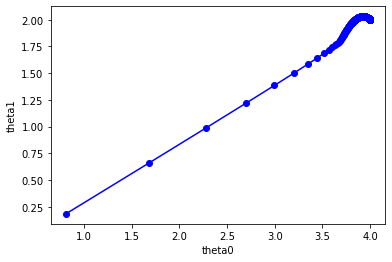

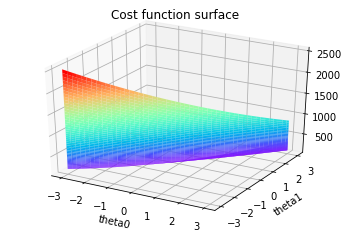

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + 4

# Closed-form solution
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Gradient descent solution
eta = 0.1 # learning rate
n_iterations = 1000
theta = np.random.randn(3,1)

m = len(X_b)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# Compare time costs and accuracy
import time

start_time = time.time()
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
cf_time = time.time() - start_time

start_time = time.time()
theta = np.random.randn(3,1)
y = y[:,np.newaxis]

theta_path = [] # to keep track of theta values during optimization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path.append(theta)

gd_time = time.time() - start_time

print(theta_best)
print(theta)

print("Closed-form solution time: {:.4f} seconds".format(cf_time))
print("Gradient descent solution time: {:.4f} seconds".format(gd_time))

# Plot optimization trajectory
theta_path = np.array(theta_path)
plt.plot(theta_path[:, 0], theta_path[:, 1], "b-o")
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.show()


# Plot optimization trajectory and contour lines of the loss function
theta_path = np.array(theta_path)

# Compute the loss function values for a grid of theta0 and theta1
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 1, 100)
X_b = np.c_[np.ones((100, 1)), X]

# Plotting the cost function
theta0_vals = np.linspace(-3,3,100)
theta1_vals = np.linspace(-3,3,100)
theta_vals = np.array(np.meshgrid(theta0_vals, theta1_vals)).T.reshape(-1, 2)

J_vals = np.array([(1/(2*100)) * np.linalg.norm(X_b.dot(np.array([[t0], [t1], [0]]))-y)**2 for t0,t1 in theta_vals])

J_vals = J_vals.reshape(100, 100)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='rainbow')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Cost function surface')
plt.show()



In [ ]:
theta = np.random.randn(3,1)
Temp = X_b.dot(theta) 

This code uses the California Housing dataset from scikit-learn, which can be loaded using the fetch_california_housing() function. It uses the median income per block as the predictor variable and the median house value as the response variable. The code then performs linear regression, polynomial regression of degree 2, and nonlinear regression using a neural network with 3 hidden layers, 20 neurons in each layer, and 10000 maximum iterations. Finally, it plots the results, showing the difference between each type of regression. In this version, polynomial features are created using PolynomialFeatures and then passed to linear regression model. You can run this code on colab by creating a new notebook, and running the above code snippet in a code cell.

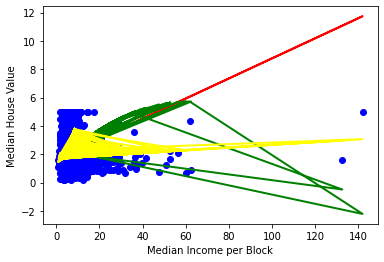

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()

X = data.data[:, [2]]
y = data.target

# Linear Regression
reg = LinearRegression().fit(X, y)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Nonlinear Regression
nn_reg = MLPRegressor(hidden_layer_sizes=(20, 20, 20), max_iter=10000).fit(X, y)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='red', linewidth=2)
plt.plot(X, poly_reg.predict(X_poly), color='green', linewidth=2)
plt.plot(X, nn_reg.predict(X), color='yellow', linewidth=2)
plt.xlabel("Median Income per Block")
plt.ylabel("Median House Value")
plt.show()
